In [2]:
%matplotlib inline
import utils ; reload (utils)
from utils import *

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1060 6GB (CNMeM is disabled, cuDNN 5110)
Using Theano backend.


In [3]:
%matplotlib inline
from __future__ import division,print_function
import os, json
from glob import glob
import numpy as np
import scipy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots, get_batches, plot_confusion_matrix, get_data

In [4]:
from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential
from keras.layers import Input
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

In [5]:
path = "/home/jiegg/open/data/roadsign/"

model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [6]:
batch_size = 60
from vgg16 import Vgg16
vgg = Vgg16()
model = vgg.model

In [7]:
model.pop()
for layer in model.layers: layer.trainable= False

In [8]:
model.add(Dense(62,activation="softmax"))

In [9]:
val_batches = get_batches(path+"valid_png",shuffle=False, batch_size=batch_size)
batches = get_batches(path+"train_png",shuffle=True , batch_size =batch_size)

Found 2520 images belonging to 62 classes.
Found 4575 images belonging to 62 classes.


In [10]:
def fit_model(model,batches,val_batches,nb_epoch=1):
    model.fit_generator(batches,samples_per_epoch=batches.n, nb_epoch = nb_epoch,
                       validation_data = val_batches,nb_val_samples=val_batches.n)

In [11]:
opt = RMSprop(lr =0.1)
model.compile(optimizer = opt,loss ="categorical_crossentropy",metrics=["accuracy"])

In [13]:
fit_model(model, batches, val_batches, nb_epoch=1)

Epoch 1/1
4575/4575 [==============================] - 87s - loss: 9.8833 - acc: 0.3867 - val_loss: 10.5991 - val_acc: 0.3421


In [13]:
fit_model(model, batches, val_batches, nb_epoch=5)

Epoch 1/5
4575/4575 [==============================] - 89s - loss: 10.0445 - acc: 0.3753 - val_loss: 11.0134 - val_acc: 0.3155
Epoch 2/5
4575/4575 [==============================] - 89s - loss: 10.4401 - acc: 0.3510 - val_loss: 11.1608 - val_acc: 0.3063
Epoch 3/5
4575/4575 [==============================] - 90s - loss: 10.1640 - acc: 0.3685 - val_loss: 11.0584 - val_acc: 0.3131
Epoch 4/5
4575/4575 [==============================] - 89s - loss: 10.2945 - acc: 0.3600 - val_loss: 10.7871 - val_acc: 0.3298
Epoch 5/5
4575/4575 [==============================] - 89s - loss: 10.1508 - acc: 0.3694 - val_loss: 10.6880 - val_acc: 0.3349


In [15]:
opt = RMSprop(lr =0.001)
model.compile(optimizer = opt,loss ="categorical_crossentropy",metrics=["accuracy"])
fit_model(model, batches, val_batches, nb_epoch=10)

Epoch 1/10
4575/4575 [==============================] - 90s - loss: 10.0761 - acc: 0.3744 - val_loss: 10.6279 - val_acc: 0.3397
Epoch 2/10
4575/4575 [==============================] - 89s - loss: 9.9683 - acc: 0.3808 - val_loss: 10.6270 - val_acc: 0.3397
Epoch 3/10
4575/4575 [==============================] - 89s - loss: 10.0386 - acc: 0.3766 - val_loss: 10.6254 - val_acc: 0.3401
Epoch 4/10
4575/4575 [==============================] - 89s - loss: 9.9288 - acc: 0.3830 - val_loss: 10.6234 - val_acc: 0.3401
Epoch 5/10
4575/4575 [==============================] - 89s - loss: 10.0822 - acc: 0.3742 - val_loss: 10.6232 - val_acc: 0.3405
Epoch 6/10
4575/4575 [==============================] - 89s - loss: 9.9480 - acc: 0.3819 - val_loss: 10.6208 - val_acc: 0.3409
Epoch 7/10
4575/4575 [==============================] - 89s - loss: 9.9382 - acc: 0.3832 - val_loss: 10.6198 - val_acc: 0.3409
Epoch 8/10
4575/4575 [==============================] - 90s - loss: 9.9360 - acc: 0.3827 - val_loss: 10.6209

In [16]:
opt = RMSprop(lr =0.0001)
model.compile(optimizer = opt,loss ="categorical_crossentropy",metrics=["accuracy"])
fit_model(model, batches, val_batches, nb_epoch=10)

Epoch 1/10
4575/4575 [==============================] - 90s - loss: 10.0199 - acc: 0.3779 - val_loss: 10.6235 - val_acc: 0.3405
Epoch 2/10
4575/4575 [==============================] - 89s - loss: 9.9782 - acc: 0.3801 - val_loss: 10.6233 - val_acc: 0.3409
Epoch 3/10
4575/4575 [==============================] - 89s - loss: 9.9713 - acc: 0.3810 - val_loss: 10.6231 - val_acc: 0.3405
Epoch 4/10
4575/4575 [==============================] - 89s - loss: 10.0253 - acc: 0.3773 - val_loss: 10.6232 - val_acc: 0.3405
Epoch 5/10
4575/4575 [==============================] - 89s - loss: 9.9382 - acc: 0.3825 - val_loss: 10.6230 - val_acc: 0.3409
Epoch 6/10
4575/4575 [==============================] - 89s - loss: 9.9479 - acc: 0.3823 - val_loss: 10.6229 - val_acc: 0.3409
Epoch 7/10
4575/4575 [==============================] - 89s - loss: 10.1012 - acc: 0.3731 - val_loss: 10.6228 - val_acc: 0.3409
Epoch 8/10
4575/4575 [==============================] - 89s - loss: 9.9512 - acc: 0.3819 - val_loss: 10.6227

In [18]:
opt = RMSprop(lr =0.00001)
model.compile(optimizer = opt,loss ="categorical_crossentropy",metrics=["accuracy"])
fit_model(model, batches, val_batches, nb_epoch=10)

Epoch 1/10
4575/4575 [==============================] - 89s - loss: 10.0047 - acc: 0.3784 - val_loss: 10.6221 - val_acc: 0.3409
Epoch 2/10
4575/4575 [==============================] - 89s - loss: 9.9633 - acc: 0.3810 - val_loss: 10.6221 - val_acc: 0.3409
Epoch 3/10
4575/4575 [==============================] - 89s - loss: 9.9759 - acc: 0.3799 - val_loss: 10.6221 - val_acc: 0.3409
Epoch 4/10
4575/4575 [==============================] - 89s - loss: 9.9818 - acc: 0.3799 - val_loss: 10.6221 - val_acc: 0.3409
Epoch 5/10
4575/4575 [==============================] - 89s - loss: 10.1139 - acc: 0.3714 - val_loss: 10.6221 - val_acc: 0.3409
Epoch 6/10
4575/4575 [==============================] - 89s - loss: 9.7581 - acc: 0.3943 - val_loss: 10.6221 - val_acc: 0.3409
Epoch 7/10
4575/4575 [==============================] - 89s - loss: 10.0264 - acc: 0.3768 - val_loss: 10.6221 - val_acc: 0.3409
Epoch 8/10
4575/4575 [==============================] - 89s - loss: 9.9435 - acc: 0.3830 - val_loss: 10.6221

In [19]:
opt = RMSprop(lr=0.001, rho=0.7)
model.compile(optimizer = opt,loss ="categorical_crossentropy",metrics=["accuracy"])
fit_model(model, batches, val_batches, nb_epoch=10)

Epoch 1/10
4575/4575 [==============================] - 90s - loss: 9.8740 - acc: 0.3873 - val_loss: 10.6211 - val_acc: 0.3409
Epoch 2/10
4575/4575 [==============================] - 89s - loss: 10.0799 - acc: 0.3740 - val_loss: 10.6201 - val_acc: 0.3409
Epoch 3/10
4575/4575 [==============================] - 89s - loss: 9.9842 - acc: 0.3801 - val_loss: 10.6210 - val_acc: 0.3405
Epoch 4/10
3875/4575 [========================>.....] - ETA: 8s - loss: 9.9732 - acc: 0.3809 

KeyboardInterrupt: 

In [20]:
model.save_weights(model_path+"roadsign.h5")

In [21]:
batch_size = 4
imgs, labels = next(batches)
model.evaluate(imgs,labels)

100/100 [==============================] - 1s     


[10.275887908935546, 0.35999999999999999]

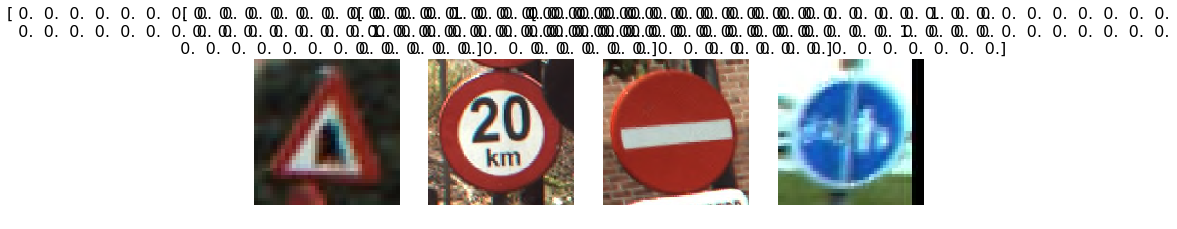

In [26]:
plots(imgs[0:4],titles = labels[0:4])

In [29]:
labels[0:1]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [30]:
def onehot(x): return np.array(OneHotEncoder().fit_transform(x,reshape(-1,1)).todense())

In [33]:
labels[61]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [34]:
labels.shape

(100, 62)

In [15]:
layers = model.layers
first_dense_idx = [index for index, layer in enumerate(layers) if type(layer) is Dense ][0]
for layer in layers[first_dense_idx:]: 
    layer.trainable = True 
    print(layer.trainable) 

True
True
True
True
True


In [40]:
K.set_value(opt.lr,0.01)
fit_model(model,batches,val_batches,3)

Epoch 1/3
4575/4575 [==============================] - 88s - loss: 10.0150 - acc: 0.3779 - val_loss: 10.5967 - val_acc: 0.3417
Epoch 2/3
4575/4575 [==============================] - 88s - loss: 9.9506 - acc: 0.3819 - val_loss: 10.5729 - val_acc: 0.3429
Epoch 3/3
4575/4575 [==============================] - 88s - loss: 9.9161 - acc: 0.3843 - val_loss: 10.5786 - val_acc: 0.3433


In [43]:
K.set_value(opt.lr,0.01)
fit_model(model,batches,val_batches,10)

Epoch 1/10
4575/4575 [==============================] - 89s - loss: 9.9615 - acc: 0.3816 - val_loss: 10.6035 - val_acc: 0.3413
Epoch 2/10
4575/4575 [==============================] - 88s - loss: 9.9652 - acc: 0.3814 - val_loss: 10.6091 - val_acc: 0.3405
Epoch 3/10
4575/4575 [==============================] - 88s - loss: 9.8936 - acc: 0.3854 - val_loss: 10.6045 - val_acc: 0.3421
Epoch 4/10
4575/4575 [==============================] - 88s - loss: 9.8793 - acc: 0.3867 - val_loss: 10.5963 - val_acc: 0.3421
Epoch 5/10
4575/4575 [==============================] - 88s - loss: 9.9303 - acc: 0.3832 - val_loss: 10.5677 - val_acc: 0.3433
Epoch 6/10
4575/4575 [==============================] - 88s - loss: 9.9021 - acc: 0.3854 - val_loss: 10.5760 - val_acc: 0.3429
Epoch 7/10
4575/4575 [==============================] - 88s - loss: 9.9208 - acc: 0.3843 - val_loss: 10.5776 - val_acc: 0.3425
Epoch 8/10
4575/4575 [==============================] - 88s - loss: 9.8524 - acc: 0.3878 - val_loss: 10.5671 - 

In [44]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[0][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[0][0]            
___________________________________________________________________________________________

In [45]:
K.set_value(opt.lr,0.01)
fit_model(model,batches,val_batches,10)

Epoch 1/10
4575/4575 [==============================] - 89s - loss: 9.9674 - acc: 0.3805 - val_loss: 10.5614 - val_acc: 0.3444
Epoch 2/10
4575/4575 [==============================] - 88s - loss: 9.8196 - acc: 0.3904 - val_loss: 10.5563 - val_acc: 0.3444
Epoch 3/10
4575/4575 [==============================] - 88s - loss: 9.9534 - acc: 0.3816 - val_loss: 10.5648 - val_acc: 0.3440
Epoch 4/10
1575/4575 [=========>....................] - ETA: 37s - loss: 9.9916 - acc: 0.3797

KeyboardInterrupt: 

In [96]:
model.save_weights(model_path+"roadsign1.h5")

In [12]:
model.load_weights(model_path+'roadsign1.h5')

In [13]:
layers =  model.layers
for layer in layers[12:]: layer.trainable=True
K.set_value(opt.lr, 0.01)


In [14]:
#removing drop out

model.load_weights(model_path+'roadsign1.h5')



In [15]:
last_conv_idx = [index for index,layer in enumerate(layers)
                if type(layer) is Convolution2D][-1]
last_conv_idx

30

In [16]:
layers[last_conv_idx]

In [17]:
conv_layers = layers[:last_conv_idx+1]
conv_model = Sequential(conv_layers)
fc_layers = layers[last_conv_idx+1:]
fc_layers

In [18]:
def proc_wgts(layer):return [o/2 for o in layer.get_weights()]


In [19]:
opt = RMSprop(lr = 0.1,rho =0.7)

In [20]:
def get_fc_model():
    fc_model = Sequential([])
    for i in range(len(conv_layers)):fc_model.add(conv_layers[i])
    fc_model.add(MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]))
    fc_model.add( Flatten()) 
    fc_model.add( Dense(4096, activation='relu'))
    fc_model.add(Dropout(0.2))
    fc_model.add(Dense(4096, activation='relu'))
    fc_model.add(Dropout(0.2))
    fc_model.add(Dense(62, activation='softmax'))
    for l1,l2 in zip(fc_model.layers, conv_layers+fc_layers): l1.set_weights(proc_wgts(l2))
    
    fc_model.compile(optimizer = opt,loss="categorical_crossentropy",metrics = ["accuracy"])
    return fc_model

In [21]:
batch_size = 64

In [22]:

fc_model = get_fc_model()

In [26]:

K.set_value(opt.lr,0.1)
fit_model(fc_model,batches,val_batches,5)

Epoch 1/5
4575/4575 [==============================] - 208s - loss: nan - acc: 0.0031 - val_loss: nan - val_acc: 0.0024
Epoch 2/5
4575/4575 [==============================] - 208s - loss: nan - acc: 0.0035 - val_loss: nan - val_acc: 0.0024
Epoch 3/5
4575/4575 [==============================] - 208s - loss: nan - acc: 0.0033 - val_loss: nan - val_acc: 0.0024
Epoch 4/5
4575/4575 [==============================] - 208s - loss: nan - acc: 0.0039 - val_loss: nan - val_acc: 0.0024
Epoch 5/5
4575/4575 [==============================] - 208s - loss: nan - acc: 0.0031 - val_loss: nan - val_acc: 0.0024


## ADD batchnorm to model

In [23]:
conv_layers[-1].output_shape[1:]


(512, 14, 14)

In [24]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(4096, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(1000, activation='softmax')
        ]

In [25]:
def load_fc_weights_from_vgg16bn(model):
    "Load weights for model from the dense layers of the Vgg16BN model."
    # See imagenet_batchnorm.ipynb for info on how the weights for
    # Vgg16BN can be generated from the standard Vgg16 weights.
    from vgg16bn import Vgg16BN
    vgg16_bn = Vgg16BN()
    _, fc_layers = split_at(vgg16_bn.model, Convolution2D)
    copy_weights(fc_layers, model.layers)

In [26]:
p = 0.6

In [27]:
bn_model = Sequential(get_bn_layers(0.6))

In [28]:
load_fc_weights_from_vgg16bn(bn_model)

In [29]:
def proc_wgts(layer, prev_p, new_p):
    scal = (1-prev_p)/(1-new_p)
    return [o*scal for o in layer.get_weights()]

In [30]:
for l in bn_model.layers: 
    if type(l)==Dense: l.set_weights(proc_wgts(l, 0.5, 0.6))

In [31]:
bn_model.pop()
for layer in bn_model.layers: layer.trainable=False

In [32]:
bn_model.add(Dense(62,activation="softmax"))

In [33]:
bn_model.compile(Adam(),"categorical_crossentropy", metrics=["accuracy"])


In [36]:
final_model = Sequential(conv_layers)
for layer in final_model.layers: layer.trainable = False
for layer in bn_model.layers: final_model.add(layer)

In [39]:
for l1,l2 in zip(bn_model.layers, bn_layers):
    l2.set_weights(l1.get_weights())

NameError: name 'bn_layers' is not defined

In [42]:
final_model.optimizer.lr

<CudaNdarrayType(float32, scalar)>

In [41]:
final_model.compile(optimizer = Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

In [42]:
final_model.fit_generator(batches,samples_per_epoch=batches.nb_sample,nb_epoch=10,
                         validation_data = val_batches,nb_val_samples=val_batches.nb_sample)

Epoch 1/10
4575/4575 [==============================] - 88s - loss: 1.9766 - acc: 0.6463 - val_loss: 4.6632 - val_acc: 0.0198
Epoch 2/10
4575/4575 [==============================] - 87s - loss: 1.5994 - acc: 0.7030 - val_loss: 3.8956 - val_acc: 0.1278
Epoch 3/10
4575/4575 [==============================] - 87s - loss: 1.3466 - acc: 0.7495 - val_loss: 5.3675 - val_acc: 0.0000e+00
Epoch 4/10
4575/4575 [==============================] - 87s - loss: 1.1130 - acc: 0.7871 - val_loss: 6.2238 - val_acc: 0.0119
Epoch 5/10
4575/4575 [==============================] - 87s - loss: 1.0641 - acc: 0.7932 - val_loss: 5.8183 - val_acc: 0.0048
Epoch 6/10
4575/4575 [==============================] - 87s - loss: 1.0627 - acc: 0.7996 - val_loss: 6.3198 - val_acc: 0.0079
Epoch 7/10
4575/4575 [==============================] - 87s - loss: 1.0054 - acc: 0.8094 - val_loss: 5.7029 - val_acc: 0.0468
Epoch 8/10
4575/4575 [==============================] - 87s - loss: 0.8293 - acc: 0.8339 - val_loss: 4.4099 - val_

In [43]:
final_model.fit_generator(batches,samples_per_epoch=batches.nb_sample,nb_epoch=20,
                         validation_data = val_batches,nb_val_samples=val_batches.nb_sample)

Epoch 1/20
4575/4575 [==============================] - 87s - loss: 0.7897 - acc: 0.8472 - val_loss: 1.4748 - val_acc: 0.6135
Epoch 2/20
4575/4575 [==============================] - 87s - loss: 0.7814 - acc: 0.8533 - val_loss: 1.1423 - val_acc: 0.7171
Epoch 3/20
4575/4575 [==============================] - 87s - loss: 0.7961 - acc: 0.8544 - val_loss: 1.2477 - val_acc: 0.7052
Epoch 4/20
4575/4575 [==============================] - 87s - loss: 0.7348 - acc: 0.8645 - val_loss: 1.1683 - val_acc: 0.7385
Epoch 5/20
4575/4575 [==============================] - 87s - loss: 0.7681 - acc: 0.8592 - val_loss: 1.1566 - val_acc: 0.7599
Epoch 6/20
4575/4575 [==============================] - 87s - loss: 0.7293 - acc: 0.8662 - val_loss: 1.2436 - val_acc: 0.7302
Epoch 7/20
4575/4575 [==============================] - 87s - loss: 0.8207 - acc: 0.8577 - val_loss: 1.2886 - val_acc: 0.7417
Epoch 8/20
4575/4575 [==============================] - 87s - loss: 0.7308 - acc: 0.8680 - val_loss: 1.0546 - val_acc:

In [44]:
 final_model.fit_generator(batches,samples_per_epoch=batches.nb_sample,nb_epoch=10,
                         validation_data = val_batches,nb_val_samples=val_batches.nb_sample)

Epoch 1/10
4575/4575 [==============================] - 87s - loss: 0.6589 - acc: 0.8973 - val_loss: 1.3084 - val_acc: 0.7734
Epoch 2/10
4575/4575 [==============================] - 87s - loss: 0.7142 - acc: 0.8769 - val_loss: 1.3146 - val_acc: 0.7615
Epoch 3/10
4575/4575 [==============================] - 87s - loss: 0.7272 - acc: 0.8804 - val_loss: 1.2912 - val_acc: 0.7651
Epoch 4/10
4575/4575 [==============================] - 87s - loss: 0.6554 - acc: 0.8940 - val_loss: 1.2594 - val_acc: 0.7841
Epoch 5/10
4575/4575 [==============================] - 87s - loss: 0.7085 - acc: 0.8883 - val_loss: 1.2332 - val_acc: 0.7849
Epoch 6/10
4575/4575 [==============================] - 87s - loss: 0.6546 - acc: 0.8885 - val_loss: 1.2053 - val_acc: 0.7754
Epoch 7/10
4575/4575 [==============================] - 87s - loss: 0.7312 - acc: 0.8848 - val_loss: 1.1902 - val_acc: 0.7940
Epoch 8/10
4575/4575 [==============================] - 87s - loss: 0.6865 - acc: 0.8951 - val_loss: 1.3610 - val_acc:

In [45]:
final_model.save_weights(model_path+"final_model_weights.h5")


In [43]:
final_model.load_weights(model_path+"final_model_weights.h5")

In [44]:
final_model.optimizer.lr 

<CudaNdarrayType(float32, scalar)>

In [45]:

final_model.fit_generator(batches,samples_per_epoch=batches.nb_sample,nb_epoch=10,
                         validation_data = val_batches,nb_val_samples=val_batches.nb_sample)

Epoch 1/10
4575/4575 [==============================] - 87s - loss: 0.7007 - acc: 0.8870 - val_loss: 1.5091 - val_acc: 0.7353
Epoch 2/10
4575/4575 [==============================] - 87s - loss: 0.7185 - acc: 0.8839 - val_loss: 1.4169 - val_acc: 0.7659
Epoch 3/10
4575/4575 [==============================] - 87s - loss: 0.6673 - acc: 0.8968 - val_loss: 1.3666 - val_acc: 0.7627
Epoch 4/10
4575/4575 [==============================] - 87s - loss: 0.6919 - acc: 0.8916 - val_loss: 1.3156 - val_acc: 0.7655
Epoch 5/10
4575/4575 [==============================] - 87s - loss: 0.6921 - acc: 0.8944 - val_loss: 1.4310 - val_acc: 0.7520
Epoch 6/10
4575/4575 [==============================] - 87s - loss: 0.6823 - acc: 0.8973 - val_loss: 1.4189 - val_acc: 0.7472
Epoch 7/10
4575/4575 [==============================] - 87s - loss: 0.7153 - acc: 0.8859 - val_loss: 1.2549 - val_acc: 0.7865
Epoch 8/10
4575/4575 [==============================] - 87s - loss: 0.7685 - acc: 0.8817 - val_loss: 1.3612 - val_acc:

In [63]:
final_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_1 (Lambda)                (None, 3, 224, 224)   0           lambda_input_1[0][0]             
____________________________________________________________________________________________________
zeropadding2d_1 (ZeroPadding2D)  (None, 3, 226, 226)   0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 64, 224, 224)  1792        zeropadding2d_1[4][0]            
____________________________________________________________________________________________________
zeropadding2d_2 (ZeroPadding2D)  (None, 64, 226, 226)  0           convolution2d_1[4][0]            
___________________________________________________________________________________________

Total params: 134,547,326
Trainable params: 254,014
Non-trainable params: 134,293,312
____________________________________________________________________________________________________


In [46]:

final_model.fit_generator(batches,samples_per_epoch=batches.nb_sample,nb_epoch=20,
                         validation_data = val_batches,nb_val_samples=val_batches.nb_sample)

Epoch 1/20
4575/4575 [==============================] - 88s - loss: 0.6759 - acc: 0.8929 - val_loss: 1.4686 - val_acc: 0.7627
Epoch 2/20
4575/4575 [==============================] - 87s - loss: 0.7254 - acc: 0.8938 - val_loss: 1.5067 - val_acc: 0.7679
Epoch 3/20
4575/4575 [==============================] - 87s - loss: 0.7435 - acc: 0.8925 - val_loss: 1.5764 - val_acc: 0.7536
Epoch 4/20
4575/4575 [==============================] - 87s - loss: 0.7159 - acc: 0.8942 - val_loss: 1.6824 - val_acc: 0.7484
Epoch 5/20
4575/4575 [==============================] - 87s - loss: 0.7645 - acc: 0.8953 - val_loss: 1.4927 - val_acc: 0.7583
Epoch 6/20
4575/4575 [==============================] - 87s - loss: 0.8074 - acc: 0.8811 - val_loss: 1.5804 - val_acc: 0.7520
Epoch 7/20
4575/4575 [==============================] - 87s - loss: 0.7090 - acc: 0.8979 - val_loss: 1.6827 - val_acc: 0.7472
Epoch 8/20
4575/4575 [==============================] - 87s - loss: 0.6878 - acc: 0.8964 - val_loss: 1.7449 - val_acc:

In [47]:
final_model.fit_generator(batches,samples_per_epoch=batches.nb_sample,nb_epoch=20,
                         validation_data = val_batches,nb_val_samples=val_batches.nb_sample)

Epoch 1/20
4575/4575 [==============================] - 87s - loss: 0.7089 - acc: 0.8975 - val_loss: 1.5085 - val_acc: 0.7762
Epoch 2/20
4575/4575 [==============================] - 87s - loss: 0.6557 - acc: 0.9043 - val_loss: 1.6247 - val_acc: 0.7571
Epoch 3/20
4575/4575 [==============================] - 87s - loss: 0.6821 - acc: 0.9016 - val_loss: 1.6439 - val_acc: 0.7544
Epoch 4/20
4575/4575 [==============================] - 87s - loss: 0.6490 - acc: 0.9051 - val_loss: 1.6872 - val_acc: 0.7563
Epoch 5/20
4575/4575 [==============================] - 87s - loss: 0.7004 - acc: 0.9040 - val_loss: 1.4738 - val_acc: 0.7698
Epoch 6/20
4575/4575 [==============================] - 87s - loss: 0.6250 - acc: 0.9089 - val_loss: 1.5907 - val_acc: 0.7778
Epoch 7/20
4575/4575 [==============================] - 87s - loss: 0.6811 - acc: 0.9080 - val_loss: 1.5198 - val_acc: 0.7770
Epoch 8/20
4575/4575 [==============================] - 87s - loss: 0.6915 - acc: 0.9012 - val_loss: 1.4281 - val_acc:

In [49]:
final_model.fit_generator(batches,samples_per_epoch=batches.nb_sample,nb_epoch=20,
                         validation_data = val_batches,nb_val_samples=val_batches.nb_sample)

Epoch 1/20
4575/4575 [==============================] - 87s - loss: 0.7028 - acc: 0.9084 - val_loss: 1.7465 - val_acc: 0.7651
Epoch 2/20
4575/4575 [==============================] - 87s - loss: 0.7668 - acc: 0.9025 - val_loss: 2.0030 - val_acc: 0.7345
Epoch 3/20
4575/4575 [==============================] - 87s - loss: 0.6860 - acc: 0.9060 - val_loss: 1.9652 - val_acc: 0.7532
Epoch 4/20
4575/4575 [==============================] - 87s - loss: 0.6861 - acc: 0.9108 - val_loss: 1.6801 - val_acc: 0.7873
Epoch 5/20
4575/4575 [==============================] - 87s - loss: 0.7024 - acc: 0.9078 - val_loss: 1.6692 - val_acc: 0.7849
Epoch 6/20
4575/4575 [==============================] - 87s - loss: 0.7170 - acc: 0.9067 - val_loss: 1.5996 - val_acc: 0.7925
Epoch 7/20
4575/4575 [==============================] - 87s - loss: 0.6881 - acc: 0.9104 - val_loss: 1.8667 - val_acc: 0.7548
Epoch 8/20
4575/4575 [==============================] - 87s - loss: 0.6263 - acc: 0.9130 - val_loss: 1.5847 - val_acc: